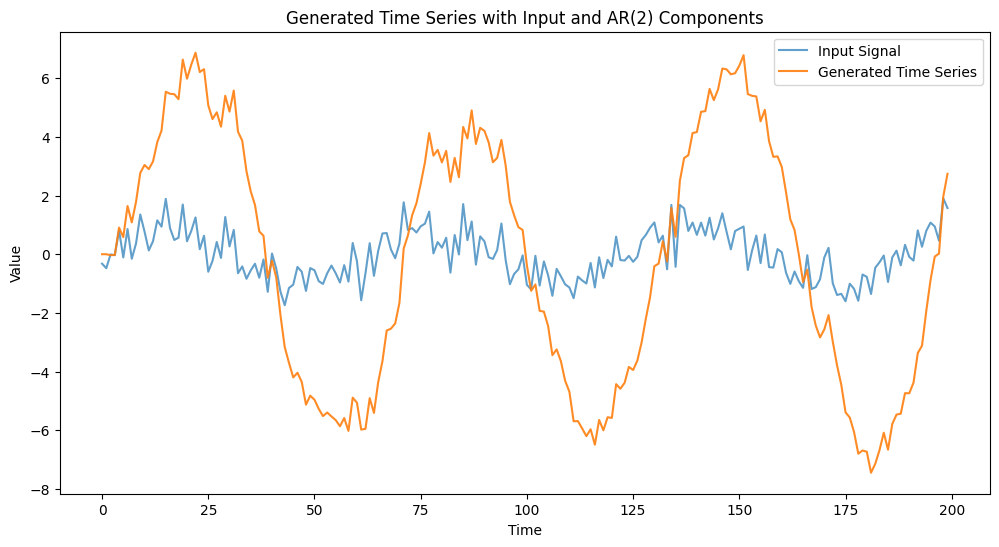

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Parameters
n = 200  # Number of time steps
phi1 = 0.6  # Coefficient for AR(1)
phi2 = 0.3  # Coefficient for AR(2)
sigma = 0.1  # Standard deviation of noise

# Generate input signal
input_signal = np.sin(np.linspace(0, 20, n)) + np.random.normal(0, 0.5, n)

# Initialize time series
time_series = np.zeros(n)

# Generate time series with AR(2) components
for t in range(2, n):
    time_series[t] = phi1 * time_series[t-1] + phi2 * time_series[t-2] + input_signal[t] + np.random.normal(0, sigma)

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Time': np.arange(n),
    'Input': input_signal,
    'Time Series': time_series
})

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Input'], label='Input Signal', alpha=0.7)
plt.plot(df['Time'], df['Time Series'], label='Generated Time Series', alpha=0.9)
plt.legend()
plt.title('Generated Time Series with Input and AR(2) Components')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [2]:
from ARX.Regressors import LinearRegression

# Initialise model
model = LinearRegression(N_AR=2)

# Extract data for training
X = np.vstack(df['Input'].values)
Y = np.vstack(df['Time Series'].values)

# Train
model.train(X, Y)

# Predictions
y0 = Y[:model.N_AR, 0]
Y_pred = model.predict(X[model.N_AR:, :], y0=y0)

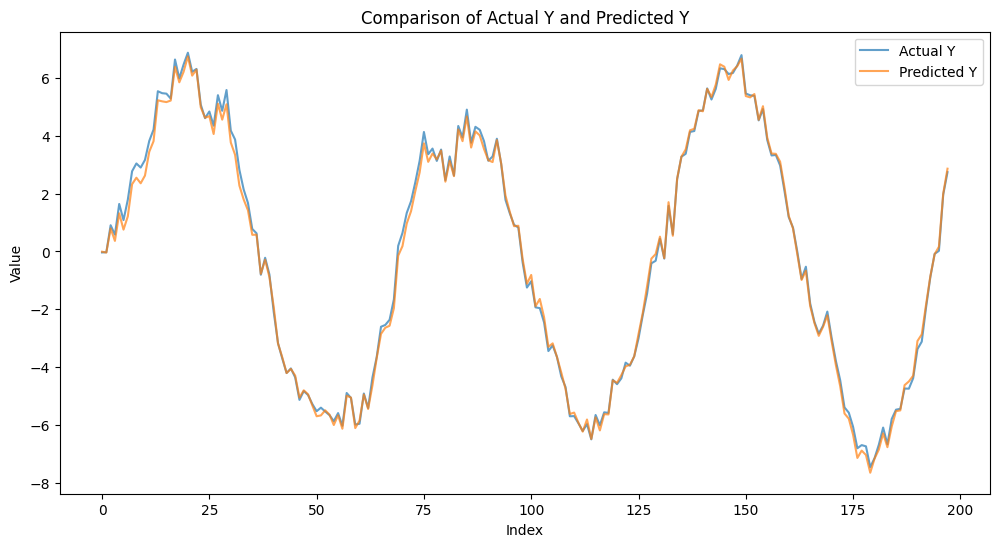

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(Y[model.N_AR:], label='Actual Y', alpha=0.7)
plt.plot(Y_pred, label='Predicted Y', alpha=0.7)
plt.legend()
plt.title('Comparison of Actual Y and Predicted Y')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()